# Project name: `Forbes. World Billionaires List 2022`

![2022](Forbes_2022.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from pandas.plotting import parallel_coordinates
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dataset
Forbes_df=pd.read_csv('2022_forbes_billionaires.csv',index_col=0)

In [3]:
#TOP5
Forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [4]:
#Last5
Forbes_df.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [5]:
#Df info
Forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 162.5+ KB


In [6]:
Forbes_df.iloc[1000]

rank                     984
name        Madhukar Parekh 
networth              $3.1 B
age                       75
country                India
source             adhesives
industry      Manufacturing 
Name: 1000, dtype: object

In [7]:
#Data describe (numeric columns)
Forbes_df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [8]:
Forbes_df['networth']

0       $219 B
1       $171 B
2       $158 B
3       $129 B
4       $118 B
         ...  
2595      $1 B
2596      $1 B
2597      $1 B
2598      $1 B
2599      $1 B
Name: networth, Length: 2600, dtype: object

In [9]:
#Transfer networth to numeric format
Forbes_df['networth']=Forbes_df['networth'].apply(lambda x:x.replace('$','')).apply(lambda x:x.replace('B','')).apply(lambda x:x.replace(' ','')).astype(np.float64)

In [10]:
Forbes_df['networth']

0       219.0
1       171.0
2       158.0
3       129.0
4       118.0
        ...  
2595      1.0
2596      1.0
2597      1.0
2598      1.0
2599      1.0
Name: networth, Length: 2600, dtype: float64

In [11]:
#Rename columns
Forbes_df=Forbes_df.rename(columns={'rank':'Rank','networth':'Networth($ Billion)','name':'Name','age':'Age','country':'Country','source':'Source','industry':'Industry'})

In [12]:
#Df info
Forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 2600 non-null   int64  
 1   Name                 2600 non-null   object 
 2   Networth($ Billion)  2600 non-null   float64
 3   Age                  2600 non-null   int64  
 4   Country              2600 non-null   object 
 5   Source               2600 non-null   object 
 6   Industry             2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 162.5+ KB


In [13]:
#Check Null values
Forbes_df.isnull().sum()

Rank                   0
Name                   0
Networth($ Billion)    0
Age                    0
Country                0
Source                 0
Industry               0
dtype: int64

In [14]:
#Check for duplicate
duplicate_rows_in_data = Forbes_df.duplicated().sum()
duplicate_rows_in_data

0

##### Everything is OK. We can make analithis.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">First Analysis is Top 10 richest in the world</h1>
</div>

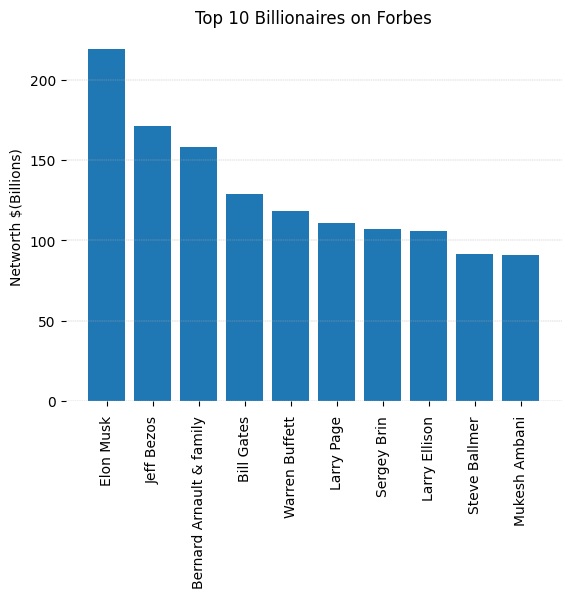

In [15]:
fig,ax=plt.subplots()
ax.bar(Forbes_df['Name'][:10],Forbes_df['Networth($ Billion)'][:10])
[s.set_visible(False) for s in ax.spines.values()]
ax.set_title('Top 10 Billionaires on Forbes')
ax.set_ylabel('Networth $(Billions)')
ax.set_xticklabels(labels=Forbes_df['Name'][:11], rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [16]:
#The Richest person
Forbes_df.loc[Forbes_df['Networth($ Billion)'] == Forbes_df['Networth($ Billion)'].max()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive


* #### This list shows the top 10 billonaires on Forbes 2022. Coming up on Number 1 is Elon Musk.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Number of billionaires by country</h2>
</div>

In [17]:
#List of countries
Forbes_df['Country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [18]:
len(Forbes_df['Country'].unique())

75

In [19]:
# Create new dataframe short the category

country_df = (Forbes_df
            .groupby('Country') 
            .agg(count=('Country', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )
country_df

,Country,count
70,United States,719
11,China,515
28,India,161
22,Germany,130
54,Russia,81
...,...,...
18,Eswatini (Swaziland),1
17,Estonia,1
6,Belize,1
4,Barbados,1


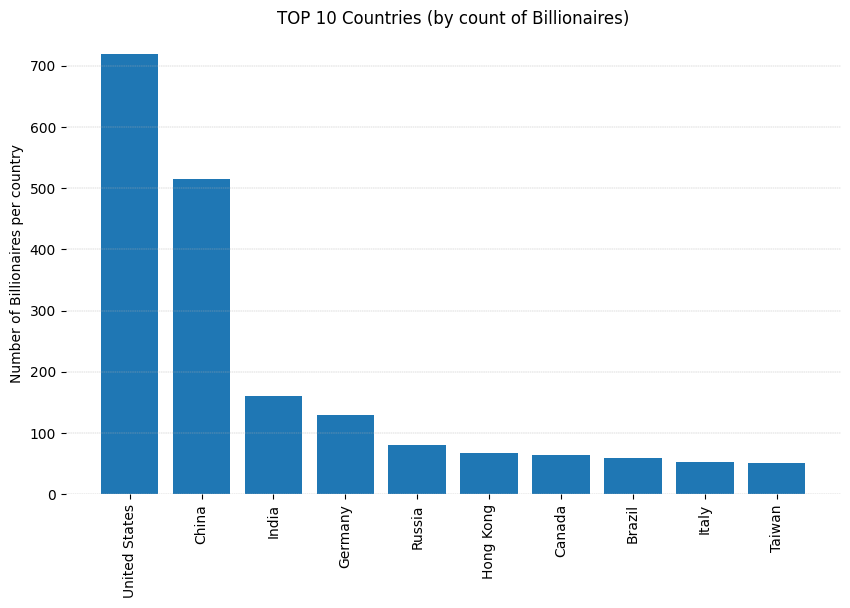

In [20]:
fig,ax2=plt.subplots(figsize=(10,6))
ax2.bar(country_df['Country'][:10], country_df['count'][:10])
[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title('TOP 10 Countries (by count of Billionaires)')
ax2.set_ylabel('Number of Billionaires per country')
ax2.set_xticklabels(labels=country_df['Country'][:10], rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

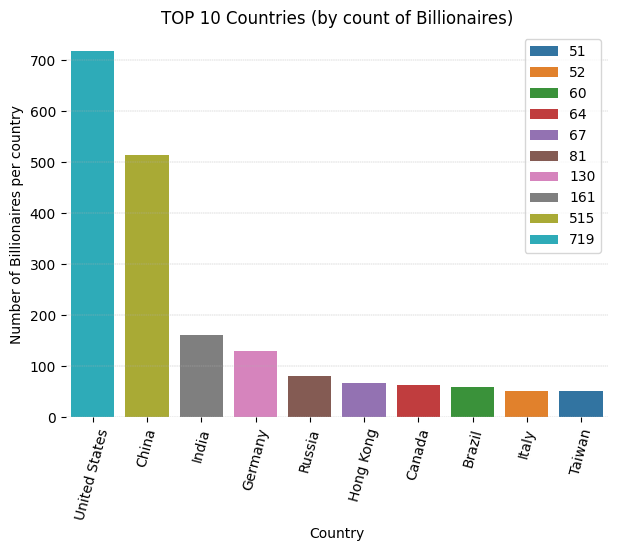

In [21]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=country_df['Country'][:10], y=country_df['count'][:10], hue=country_df['count'][:10], dodge=False)
[s.set_visible(False) for s in ax1.spines.values()]
ax1.set_title('TOP 10 Countries (by count of Billionaires)')
ax1.set_ylabel('Number of Billionaires per country')
ax1.set_xticklabels(labels=country_df['Country'][:10],rotation=75)
ax1.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

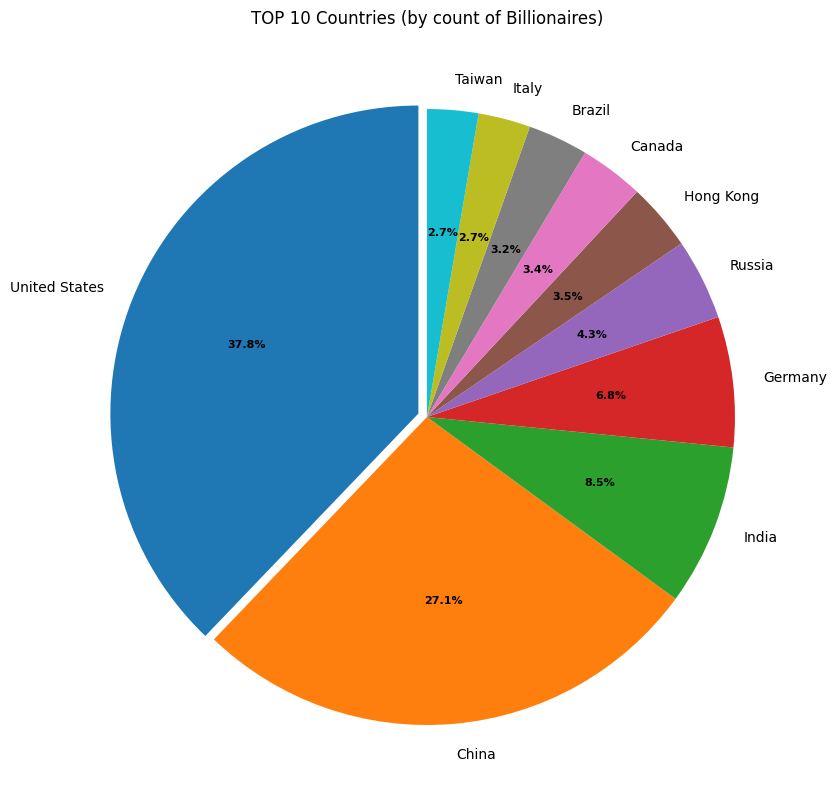

In [22]:
#create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('TOP 10 Countries (by count of Billionaires)')

# we pass the data to the function plt.pie()
wedges, texts, autotexts = ax.pie(country_df['count'][:10], labels=country_df['Country'][:10], autopct='%1.1f%%', startangle=90, explode = (0.03,0,0,0,0,0,0,0,0,0))

# format the texts in the middle of the pie chart
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=10)

plt.show()

* #### We can see that the billionaires are mostly from the US, China, and India.
* #### The list includes citizens of 75 countries. 

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Billionaires from Africa</h2>
</div>

#### The dataset does not have a column for Continent but we can create a list of all African countries and then create a function from it to check which countries meet up.

In [23]:
Country_counts=Forbes_df.groupby('Country').size()
Country_counts=Country_counts.to_frame()
Country_counts=Country_counts.rename(columns={0:'Count'})
Country_counts=Country_counts.sort_values(by='Count',ascending=False)

In [24]:
Africa=[ 'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verd','Central African Republic',
        'Chad','Comoros','Congo-Brazzaville','Congo-Kinshasa',"Côte d'Ivoire",'Djibouti','Egypt','Equatorial Guinea','Eritrea',
        'Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malaw',
        'Mali','Mauritania','Mauritius','Mayotte','Morocco','Mozambique','Namibia','Niger', 'Nigeria','Reunion','Rwanda',
        'Saint Helena','Sao Tome and Príncipe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan',
        'Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara(SADR)','Zambia','Zimbabwe']

In [25]:
Country_in_list=[]
for Country in Africa:
    if Country in Country_counts.index:
        Country_in_list.append(Country)

In [26]:
Country_in_list

['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']

#### Apparently, there are seven African countries present in the list. The countries with the highest count would be:

In [27]:
Country_counts.loc[['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']]

,Count
Country,
Algeria,1
Egypt,6
Morocco,2
Nigeria,3
South Africa,5
Tanzania,1
Zimbabwe,1


In [28]:
Forbes_df[Forbes_df['Country'].isin(Country_in_list)].index.tolist()

[129,
 233,
 244,
 310,
 323,
 359,
 546,
 906,
 934,
 1027,
 1266,
 1342,
 1445,
 1513,
 1686,
 1956,
 2019,
 2198,
 2515]

In [29]:
African_Billonaires=Forbes_df.iloc[Forbes_df[Forbes_df['Country'].isin(Country_in_list)].index.tolist()]
African_Billonaires

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
129,130,Aliko Dangote,14.0,64,Nigeria,"cement, sugar",Manufacturing
233,230,Johann Rupert & family,8.9,71,South Africa,luxury goods,Fashion & Retail
244,241,Nicky Oppenheimer & family,8.7,76,South Africa,diamonds,Metals & Mining
310,304,Nassef Sawiris,7.7,61,Egypt,"construction, investments",Construction & Engineering
323,324,Mike Adenuga,7.3,68,Nigeria,"telecom, oil",Diversified
359,350,Abdulsamad Rabiu,6.9,61,Nigeria,"cement, sugar",Diversified
546,536,Issad Rebrab & family,5.1,78,Algeria,food,Food & Beverage
906,883,Naguib Sawiris,3.4,67,Egypt,telecom,Telecom
934,913,Patrice Motsepe,3.3,60,South Africa,mining,Metals & Mining
1027,1012,Strive Masiyiwa,3.0,61,Zimbabwe,telecom,Telecom


In [30]:
African_Billonaires['Name'].count()

19

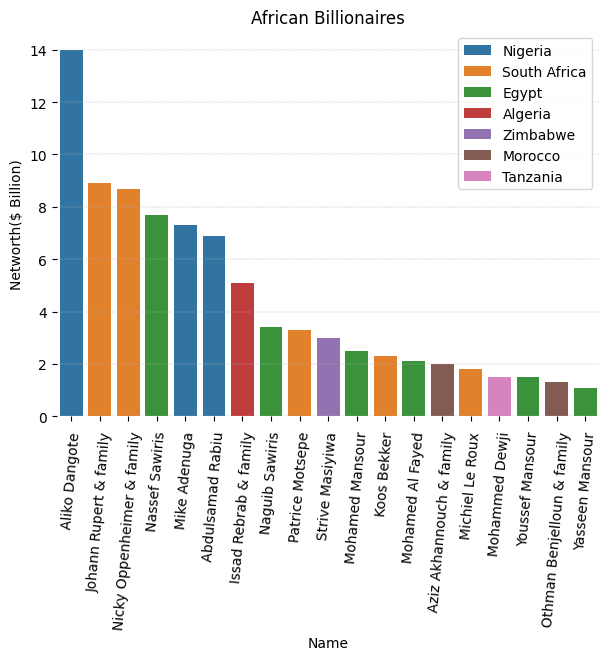

In [31]:
fig, ax1 = plt.subplots(figsize=(7,5))
sns.barplot(x=African_Billonaires['Name'], y=African_Billonaires['Networth($ Billion)'], hue=African_Billonaires['Country'], dodge=False)
[s.set_visible(False) for s in ax1.spines.values()]
ax1.set_title('African Billionaires')
ax1.set_ylabel('Networth($ Billion)')
ax1.set_xticklabels(labels=African_Billonaires['Name'],rotation=85)
ax1.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [32]:
#The Richest person
African_Billonaires.loc[African_Billonaires['Networth($ Billion)'] == African_Billonaires['Networth($ Billion)'].max()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
129,130,Aliko Dangote,14.0,64,Nigeria,"cement, sugar",Manufacturing


* #### The list includes 19 citizens from 7 African countries.
* #### The richest person is Aliko Dangote from Nigeria.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Number of billionaires by Industry</h2>
</div>

In [33]:
Forbes_df['Industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [34]:
Forbes_df['Industry']=Forbes_df['Industry'].apply(lambda x:x.replace(' ',''))

In [35]:
Industry_count=Forbes_df.groupby('Industry').size()

In [36]:
Industry_count=Industry_count.to_frame()
Industry_count=Industry_count.rename(columns={0:'Count'})
Industry_count=Industry_count.sort_values(by='Count',ascending=False)
Industry_count

,Count
Industry,
Finance&Investments,386
Technology,329
Manufacturing,322
Fashion&Retail,246
Healthcare,212
Food&Beverage,201
RealEstate,189
Diversified,178
Media&Entertainment,95


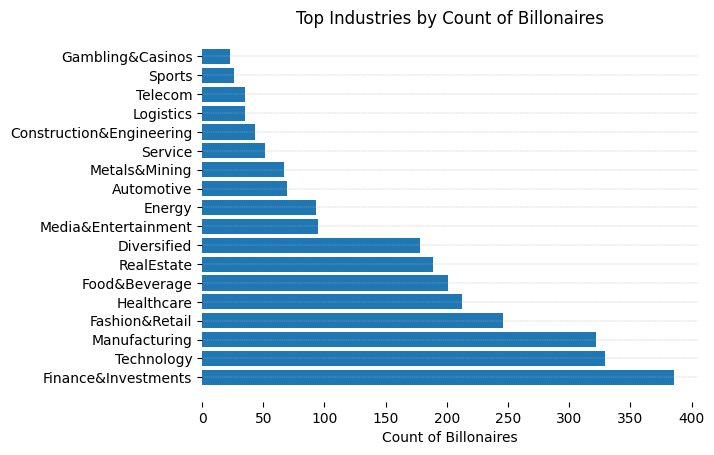

In [37]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(Industry_count.index,Industry_count['Count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [38]:
# Create new dataframe short the category
top_cat = (Forbes_df
            .groupby('Industry') 
            .agg(count=('Industry', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )

In [39]:
# set the angle
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_cat), endpoint=False)

In [40]:
# define count
COUNT = top_cat['count'].values

In [41]:
# define names
CAT = top_cat["Industry"].values

In [42]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Arial"}) #"Bell MT"

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#ff70a6","#ff9770","#ffd670","#70d6ff"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

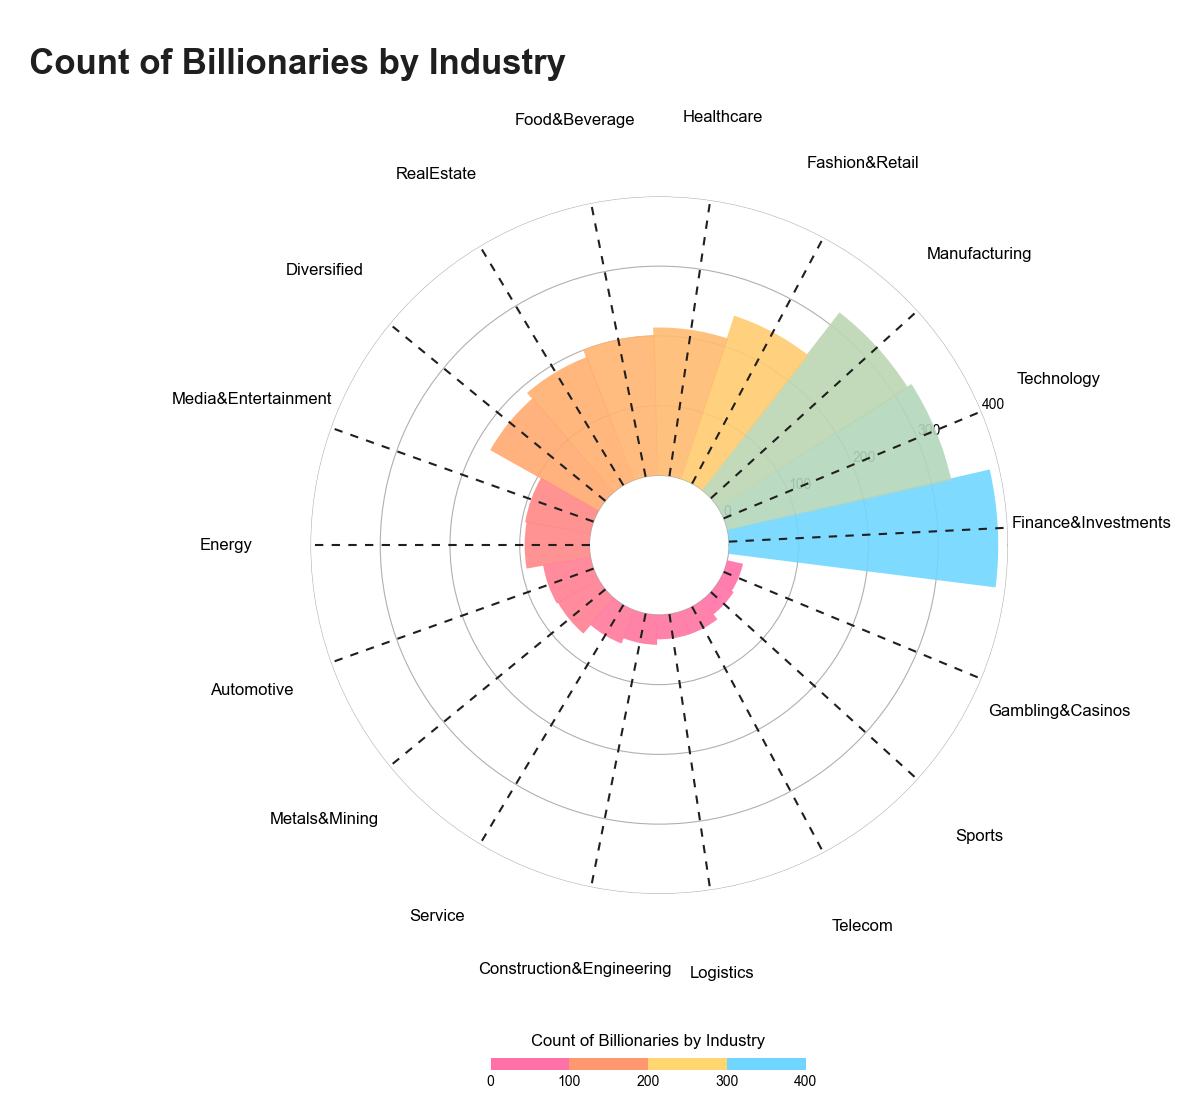

In [43]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-100, 400)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

CAT = ["\n".join(wrap(r, 5, break_long_words=False)) for r in CAT]
CAT

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(CAT, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 200, 300, 400]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 200, 300, 400]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Count of Billionaries by Industry", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\n  Count of Billionaries by Industry"

#caption = "(fig. 10) Data Visualisation of Billionaries by Industry"
caption = ""

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline");

* #### TOP Industries by number: Finance & Investments, Technology and Manufacturing.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Sum by Industry</h2>
</div>

In [44]:
# Create new dataframe short the category

top_cat1 = (Forbes_df
            .groupby('Industry') 
            .agg(sum=('Networth($ Billion)', 'sum'))
            .reset_index()
            .sort_values('sum',ascending=False)
            )
top_cat1

,Industry,sum
16,Technology,2168.40
5,Finance&Investments,1734.30
4,Fashion&Retail,1613.20
10,Manufacturing,1079.80
2,Diversified,939.50
6,Food&Beverage,933.35
8,Healthcare,708.90
13,RealEstate,685.80
0,Automotive,582.60
11,Media&Entertainment,493.60


In [45]:
# set the angle
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_cat), endpoint=False)

In [46]:
# define Sum
COUNT = top_cat1['sum'].values

In [47]:
# define name
CAT = top_cat1["Industry"].values

In [48]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Arial"}) #"Bell MT"

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#ff70a6","#ff9770","#ffd670","#70d6ff"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

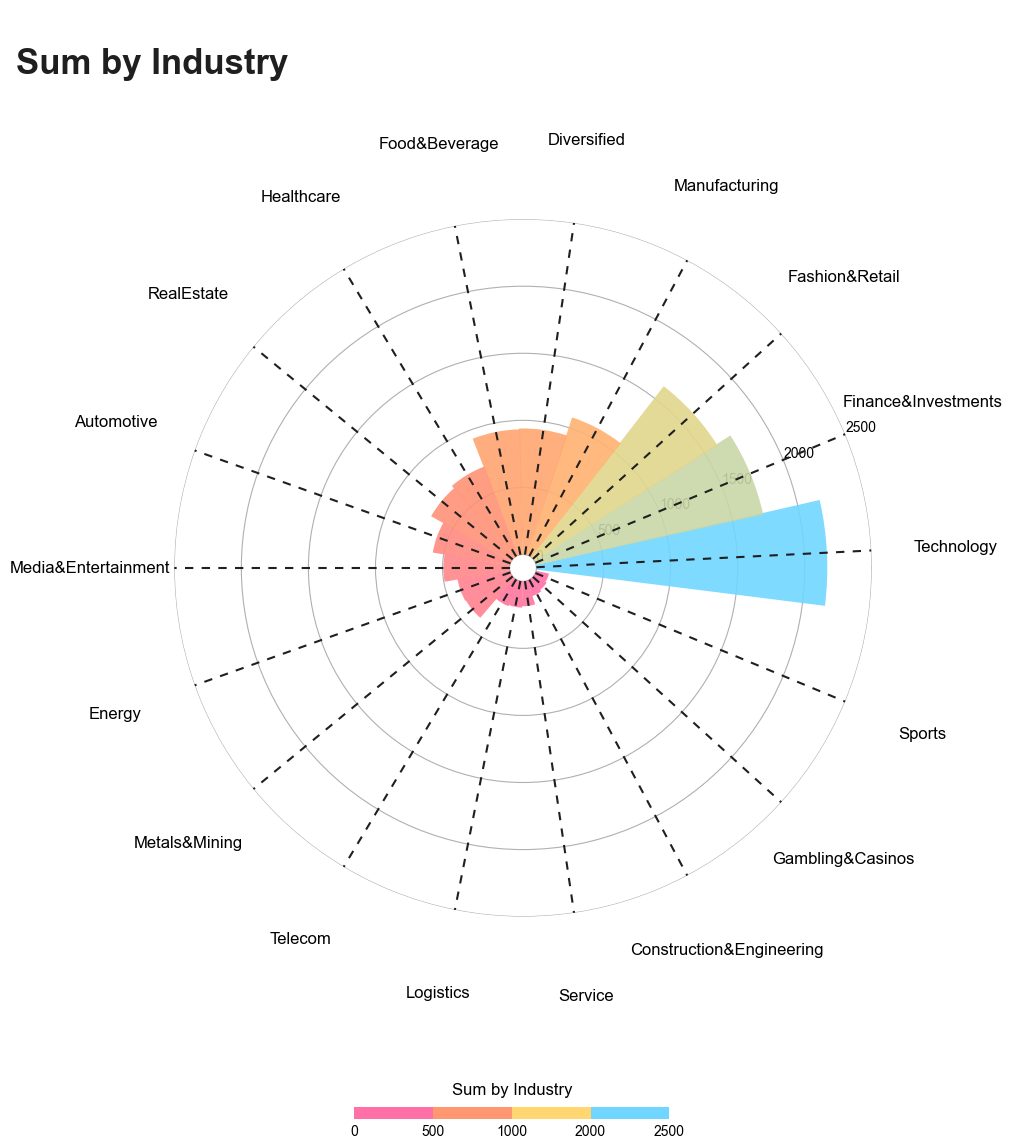

In [49]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-100, 2500)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

CAT = ["\n".join(wrap(r, 5, break_long_words=False)) for r in CAT]
CAT

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(CAT, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 500, 1000, 2000, 2500]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 500, 1000, 2000, 2500]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Sum by Industry", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nSum by Industry"

#caption = "(fig. 10) Data Visualisation of Billionaries by Industry"
caption = ""

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline");

* #### TOP Industries by sum: Technology, Finance&Investments and Fashion&Retail.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Billionaires by Age</h2>
</div>

In [50]:
By_Age=Forbes_df.sort_values(by='Age',ascending=True)
By_Age

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals&Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance&Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance&Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance&Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food&Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


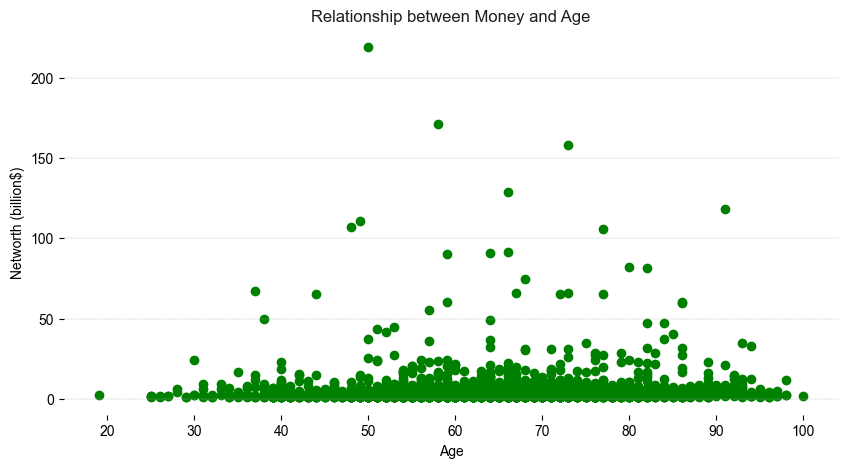

In [51]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(Forbes_df['Age'],Forbes_df['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

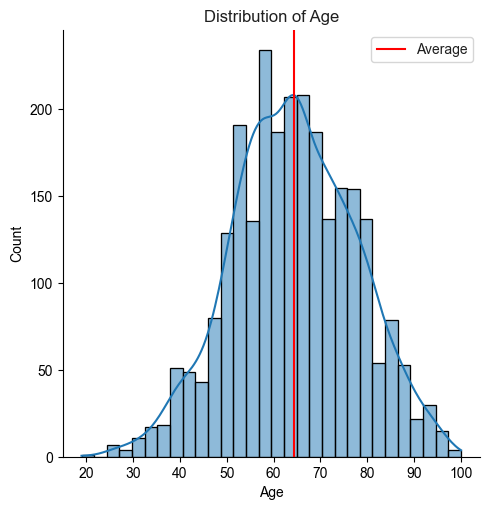

In [53]:
sns.displot(By_Age, x='Age', kde=True)
plt.axvline(x=By_Age.Age.mean(), color='red', label='Average')
#plt.axvline(x=By_Age.Age.median(), color='green', label='Median')
plt.legend(loc = 'upper right')
plt.title('Distribution of Age');

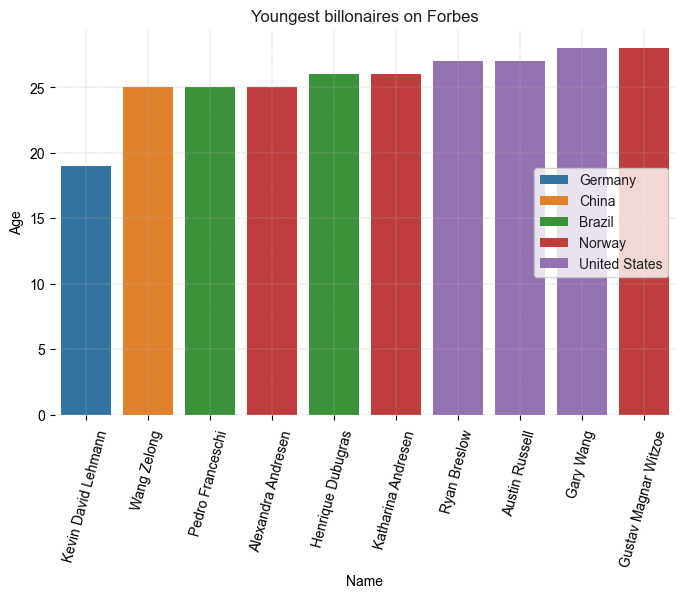

In [54]:
fig, ax6 = plt.subplots(figsize=(8,5))
sns.barplot(x=By_Age['Name'][:10], y=By_Age['Age'][:10], hue=By_Age['Country'][:10], dodge=False)
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Youngest billonaires on Forbes')
ax6.set_ylabel('Age')
ax6.set_xticklabels(labels=By_Age['Name'][:10],rotation=75)
ax6.legend(fontsize=10,loc='center right') #upper left
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.grid(axis='x',linestyle='--',linewidth=0.3)
plt.show()

In [55]:
#The Oldest person
By_Age.loc[By_Age['Age'] == By_Age['Age'].max()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1681,1645,George Joseph,1.8,100,United States,insurance,Finance&Investments


In [56]:
#The Youngest person
By_Age.loc[By_Age['Age'] == By_Age['Age'].min()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail


In [57]:
#The average age of the people on the list
int(By_Age.Age.mean())

64

* #### We have 2600 person in Forbes 2022. The youngest 19 y.o., the Oldest 100 y.o.
* #### The average age of the people on the list is 64 years.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Billionaires by Name Charles</h2>
</div>

In [58]:
Charles_Billonaires=Forbes_df.loc[Forbes_df['Name'].str.contains("Charles", case=False)]
Charles_Billonaires

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
20,21,Charles Koch,60.0,86,United States,Koch Industries,Diversified
152,152,Charles Schwab,12.2,84,United States,discount brokerage,Finance&Investments
241,241,Charles Ergen,8.7,69,United States,satellite TV,Media&Entertainment
452,438,Charles Simonyi,5.8,73,United States,Microsoft,Technology
494,490,Charles Dolan & family,5.4,95,United States,cable television,Media&Entertainment
540,536,Charles B. Johnson,5.1,89,United States,money management,Finance&Investments
804,801,Charles Edelstenne,3.7,84,France,aviation,Manufacturing
824,822,Charles Cohen,3.6,70,United States,real estate,RealEstate
1047,1012,Charles Zegar,3.0,74,United States,Bloomberg LP,Media&Entertainment
1242,1238,Charles Bronfman,2.5,90,Canada,liquor,Food&Beverage


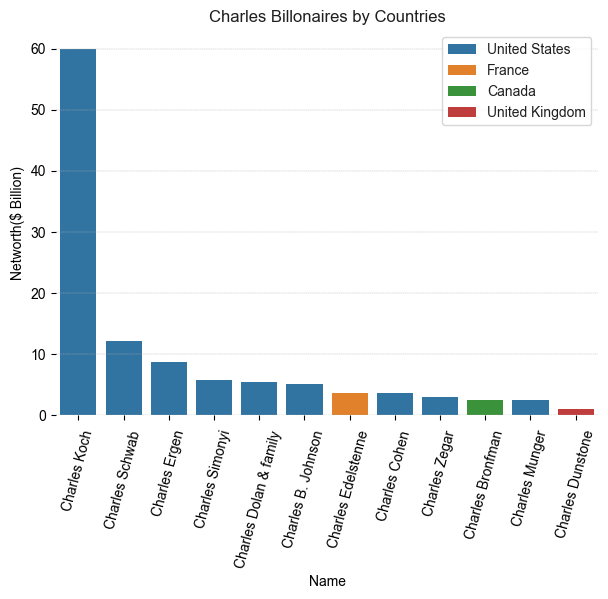

In [59]:
fig, ax9 = plt.subplots(figsize=(7,5))
sns.barplot(x=Charles_Billonaires['Name'], y=Charles_Billonaires['Networth($ Billion)'], hue=Charles_Billonaires['Country'], dodge=False)
[s.set_visible(False) for s in ax9.spines.values()]
ax9.set_title('Charles Billonaires by Countries')
ax9.set_ylabel('Networth($ Billion)')
ax9.set_xticklabels(labels=Charles_Billonaires['Name'],rotation=75)
ax9.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

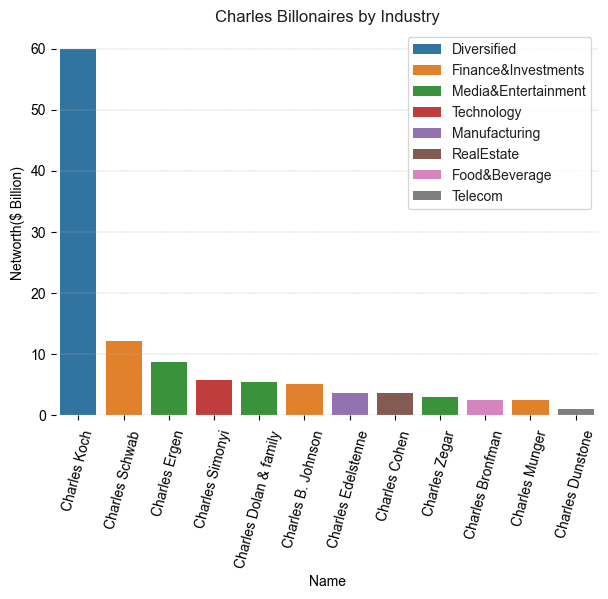

In [60]:
fig, ax9 = plt.subplots(figsize=(7,5))
sns.barplot(x=Charles_Billonaires['Name'], y=Charles_Billonaires['Networth($ Billion)'], hue=Charles_Billonaires['Industry'], dodge=False)
[s.set_visible(False) for s in ax9.spines.values()]
ax9.set_title('Charles Billonaires by Industry')
ax9.set_ylabel('Networth($ Billion)')
ax9.set_xticklabels(labels=Charles_Billonaires['Name'],rotation=75)
ax9.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [61]:
#The Richest person
Charles_Billonaires.loc[Charles_Billonaires['Networth($ Billion)'] == Charles_Billonaires['Networth($ Billion)'].max()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
20,21,Charles Koch,60.0,86,United States,Koch Industries,Diversified


* #### We have 12 Billionaires with name Charles from 4 countries.
* #### The richest person is Charles Koch from US.

<div style="background-color:rgba(68, 167, 196, 0.9);border-radius:5px;display:fill"><h2 style="text-align: center;
padding: 12px 0px 12px 0px;">Billionaires from Ukraine</h2>
</div>

In [62]:
Forbes_df['Country'][Forbes_df['Country']=='Ukraine'].index.tolist()

[686, 1622, 2266, 2318, 2452, 2567]

In [63]:
Ukrainian_Billonaires=Forbes_df.iloc[[686, 1622, 2266, 2318, 2452, 2567]]
Ukrainian_Billonaires

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
686,687,Rinat Akhmetov,4.2,55,Ukraine,"steel, coal",Metals&Mining
1622,1579,Victor Pinchuk,1.9,61,Ukraine,"steel pipes, diversified",Metals&Mining
2266,2190,Vadim Novinsky,1.3,58,Ukraine,steel,Metals&Mining
2318,2190,Kostyantin Zhevago,1.3,48,Ukraine,mining,Metals&Mining
2452,2448,Henadiy Boholyubov,1.1,60,Ukraine,"banking, investments",Diversified
2567,2448,Vlad Yatsenko,1.1,38,Ukraine,fintech,Finance&Investments


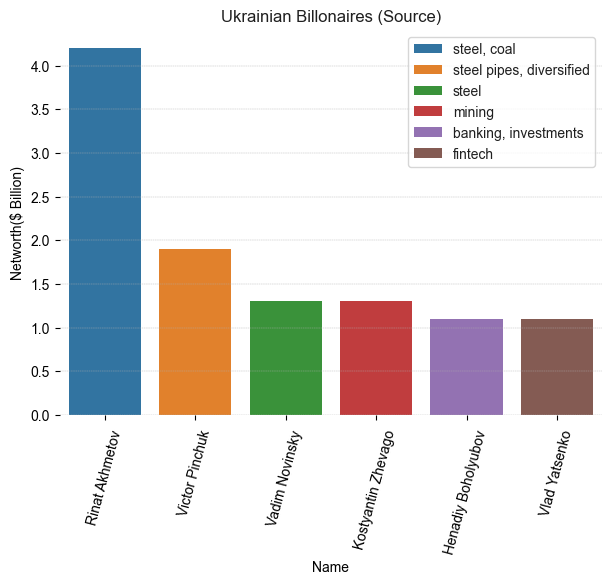

In [64]:
fig, ax9 = plt.subplots(figsize=(7,5))
sns.barplot(x=Ukrainian_Billonaires['Name'], y=Ukrainian_Billonaires['Networth($ Billion)'], hue=Ukrainian_Billonaires['Source'], dodge=False)
[s.set_visible(False) for s in ax9.spines.values()]
ax9.set_title('Ukrainian Billonaires (Source)')
ax9.set_ylabel('Networth($ Billion)')
ax9.set_xticklabels(labels=Ukrainian_Billonaires['Name'],rotation=75)
ax9.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

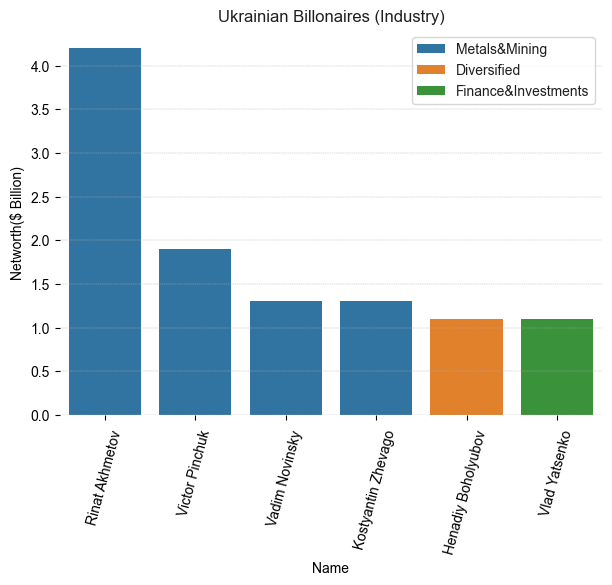

In [65]:
fig, ax8 = plt.subplots(figsize=(7,5))
sns.barplot(x=Ukrainian_Billonaires['Name'], y=Ukrainian_Billonaires['Networth($ Billion)'], hue=Ukrainian_Billonaires['Industry'], dodge=False)
[s.set_visible(False) for s in ax8.spines.values()]
ax8.set_title('Ukrainian Billonaires (Industry)')
ax8.set_ylabel('Networth($ Billion)')
ax8.set_xticklabels(labels=Ukrainian_Billonaires['Name'],rotation=75)
ax8.legend(fontsize=10,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

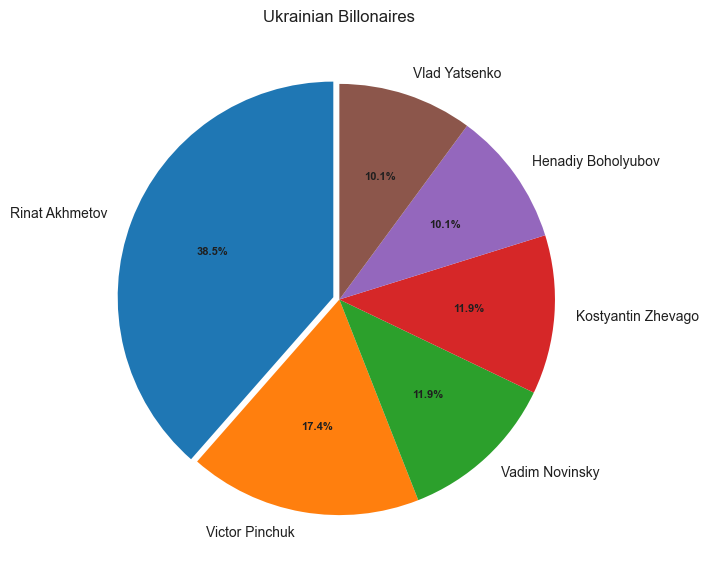

In [66]:
#create a pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Ukrainian Billonaires')

# we pass the data to the function plt.pie()
wedges, texts, autotexts = ax.pie(Ukrainian_Billonaires['Networth($ Billion)'], labels=Ukrainian_Billonaires['Name'], autopct='%1.1f%%', startangle=90, explode = (0.03,0,0,0,0,0))

# format the texts in the middle of the pie chart
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=10)

plt.show()

In [67]:
#The Richest person
Ukrainian_Billonaires.loc[Ukrainian_Billonaires['Networth($ Billion)'] == Ukrainian_Billonaires['Networth($ Billion)'].max()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
686,687,Rinat Akhmetov,4.2,55,Ukraine,"steel, coal",Metals&Mining


In [68]:
#The Youngest person
Ukrainian_Billonaires.loc[Ukrainian_Billonaires['Age'] == Ukrainian_Billonaires['Age'].min()]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
2567,2448,Vlad Yatsenko,1.1,38,Ukraine,fintech,Finance&Investments


* #### We have 6 Ukrainian Billionaires in Forbes 2022.
* #### The richest person is Rinat Akhmetov (Metals&Mining). 
* #### The youngest person is Vlad Yatsenko (Finance&Investment).